In [1]:
suppressPackageStartupMessages(suppressWarnings(library(lintr))) # linting
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes

In [2]:
# get path for confusion matrix
confusion_matrix_path <- file.path("../../../results/2.modeling/confusion_matrix.csv.gz")
overlapping_confusion_matrix_path <- file.path("../../../results/2.modeling/jump_overlap_confusion_matrix.csv.gz")
cm_df <- read.csv(confusion_matrix_path, sep = ",")
overlapping_cm_df <- read.csv(overlapping_confusion_matrix_path, sep = ",")

In [3]:
# update one of the shuffled_model columns to Shuffled and Not Shuffled
cm_df$shuffled_model <- ifelse(cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(cm_df$shuffled_model == "True", "Shuffled", cm_df$shuffled_model))

# Display the updated DataFrame
head(cm_df)

,dataset_type,shuffled_model,true_labels,predicted_labels,count,recall
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,Train,Not Shuffled,Control,Control,4749,0.915205242
2,Train,Not Shuffled,Cytoskeletal,Control,37,0.007130468
3,Train,Not Shuffled,Hsp90,Control,10,0.001927154
4,Train,Not Shuffled,Kinase,Control,47,0.009057622
5,Train,Not Shuffled,Genotoxin,Control,123,0.023703989
6,Train,Not Shuffled,Miscellaneous,Control,131,0.025245712


In [4]:
# update one of the shuffled_model columns to Shuffled and Not Shuffled
overlapping_cm_df$shuffled_model <- ifelse(overlapping_cm_df$shuffled_model == "False", "Not Shuffled",
                            ifelse(overlapping_cm_df$shuffled_model == "True", "Shuffled", overlapping_cm_df$shuffled_model))

# Display the updated DataFrame
head(overlapping_cm_df)

,dataset_type,shuffled_model,true_labels,predicted_labels,count,recall
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,JUMP Overlap,Not Shuffled,Control,Control,5,1
2,JUMP Overlap,Not Shuffled,Cytoskeletal,Control,0,0
3,JUMP Overlap,Not Shuffled,Hsp90,Control,0,0
4,JUMP Overlap,Not Shuffled,Kinase,Control,0,0
5,JUMP Overlap,Not Shuffled,Genotoxin,Control,0,0
6,JUMP Overlap,Not Shuffled,Miscellaneous,Control,0,0


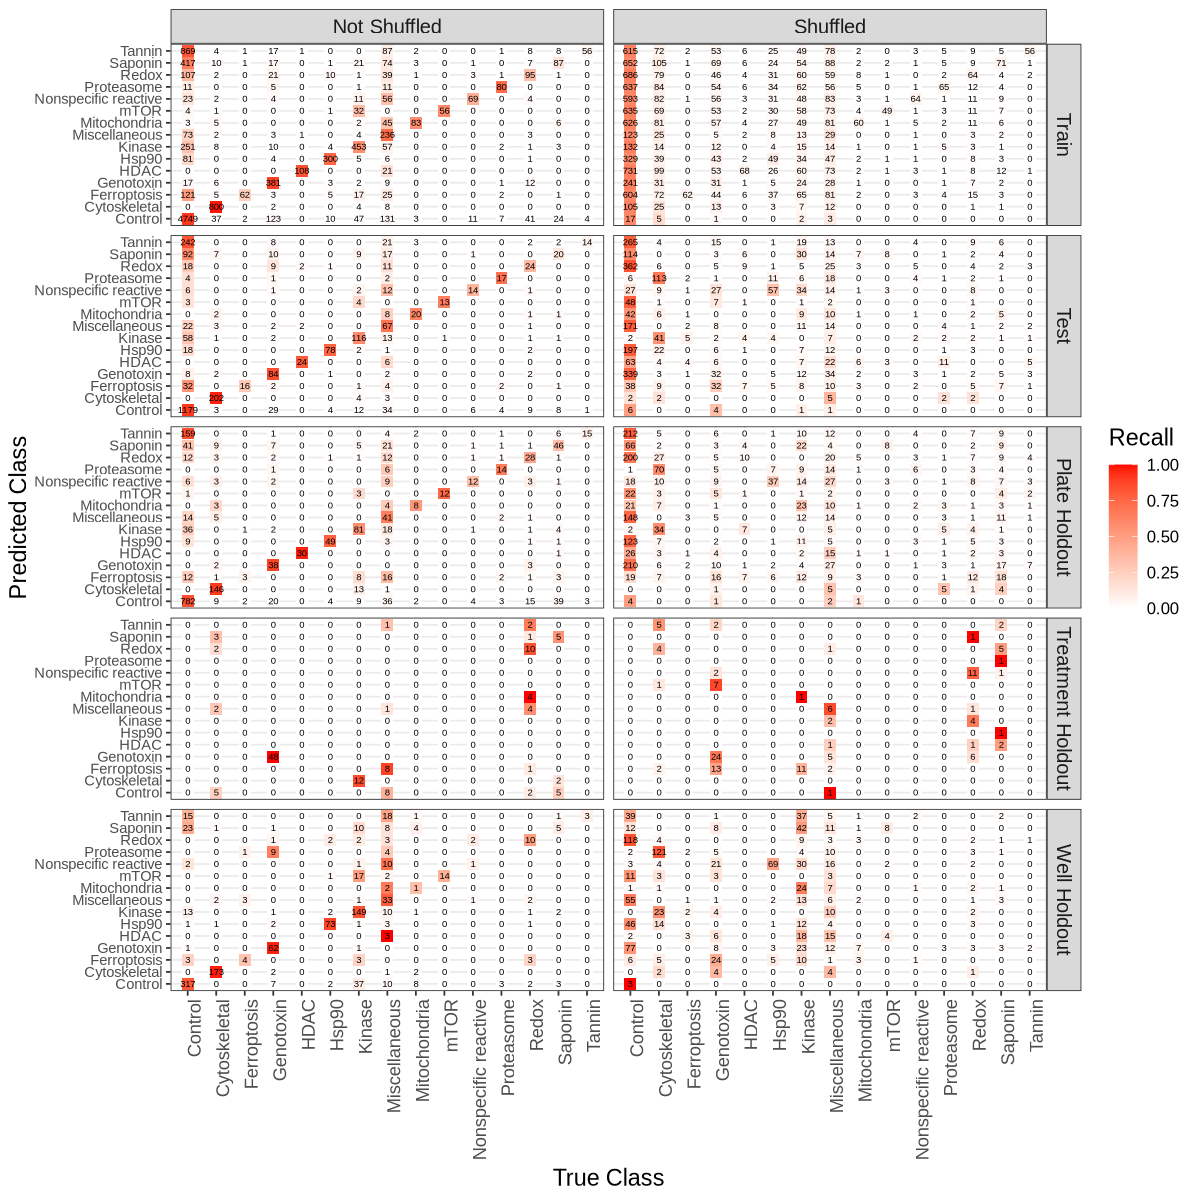

In [5]:
# Define the desired order of facet levels
facet_order <- c("Train", "Test", "Plate Holdout", "Treatment Holdout", "Well Holdout")
cm_df$dataset_type <- factor(cm_df$dataset_type, levels = facet_order)

width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

confusion_matrix_plot <- (
    ggplot(cm_df, aes(x = true_labels, y = predicted_labels))
    + facet_grid(dataset_type ~ shuffled_model)
    + geom_point(aes(color = recall), size = 3, shape = 15)
    + geom_text(aes(label = count), size = 2)
    + scale_color_gradient("Recall", low = "white", high = "red", limits = c(0, 1))
    + theme_bw()
    + ylab("Predicted Class")
    + xlab("True Class")
    + theme(
        legend.title =  element_text(size = 14, margin = margin(b = 10)),
        legend.text = element_text(size = 10),
        strip.text = element_text(size = 12),
        axis.text.x = element_text(angle = 90, hjust = 1, size = 11),
        axis.title.x.bottom = element_text(size = 14),
        axis.title.y.left = element_text(size = 14)
        )
)

# saving file
ggsave(filename = "confusion_matrix.png", height = height, width = width, dpi = 600)

confusion_matrix_plot


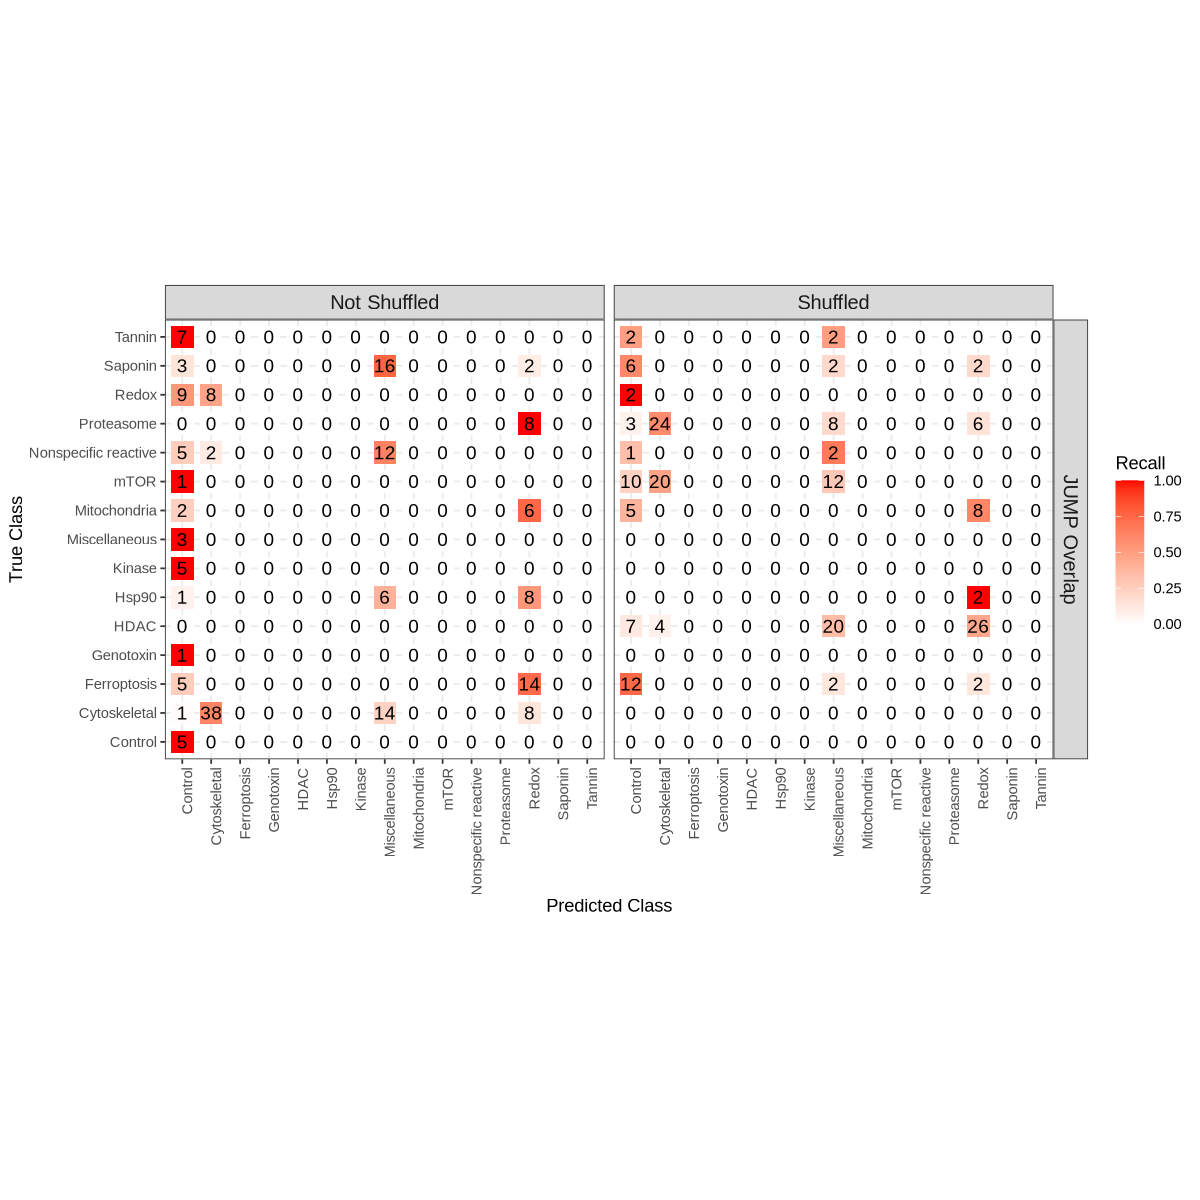

In [6]:
# set image dim
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

# create a confusion matrix plot
overlapping_confusion_matrix_plot <- (
    ggplot(overlapping_cm_df, aes(x = true_labels, y = predicted_labels))
    + facet_grid(dataset_type~shuffled_model)
    + geom_point(aes(color = recall), size = 6, shape = 15)
    + geom_text(aes(label = count), size = 4)
    + scale_color_gradient("Recall", low = "white", high = "red",limits = c(0, 1))
    + theme_bw()
    + ylab("True Class")
    + xlab("Predicted Class")
    + theme(strip.text = element_text(size = 12))
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + ggplot2::coord_fixed()
)

# saving file
ggsave(filename = "overlapping_confusion_matrix.png", height = height, width = width, dpi=600)

overlapping_confusion_matrix_plot